In [1]:
%load_ext autoreload
%autoreload 2

import diveslowlearnfast as dlf

from diveslowlearnfast.datasets import Diving48Dataset
from diveslowlearnfast.config import Config
from torch.utils.data import DataLoader

In [10]:

cfg = Config()
cfg.DATA.DATASET_PATH = '/Users/youritomassen/Projects/xai/data/Diving48/'
cfg.DATA.NUM_FRAMES = 8
diving48 = Diving48Dataset(
    cfg.DATA.DATASET_PATH,
    cfg.DATA.NUM_FRAMES,
    cfg.SLOWFAST.ALPHA,
    transform_fn=dlf.get_test_transform(cfg),
    use_sampling_ratio=True,
    should_wrap_around=False,
    loader_mode='jpg',
    video_ids=['3qq031609lA_00002', 'aektxm8cLdo_00000', 'iv0Gu1VXAgc_00167']
)
loader = DataLoader(
    diving48,
    batch_size=cfg.TRAIN.BATCH_SIZE,
    pin_memory=cfg.DATA_LOADER.PIN_MEMORY,
    shuffle=True,
)

In [3]:
x, y, *_ = diving48[0]
x.shape

[ 12  29  46  64  81  99 116 134]


torch.Size([3, 8, 256, 256])

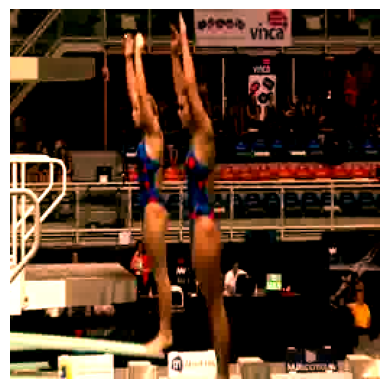

In [4]:
dlf.frameshow(x, frame_idx=2)

In [13]:
xb, yb, *_ = next(iter(loader))

In [14]:
xb.shape

torch.Size([3, 3, 8, 256, 256])

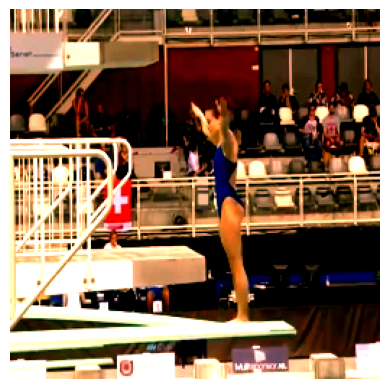

In [26]:
dlf.frameshow(xb[0], frame_idx=0)